In [1]:
#경고 끄기
import warnings
warnings.filterwarnings(action='ignore')

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

plt.rc('font', family='Malgun Gothic')

### 단량별 가격 sbidpric
- 거래단량 delngprut이 얼마에 거래됬는지 나타내는 변수
- sbidpric만으로는 g, kg, ton 단위가 너무 포괄적이기 때문에 kg당 가격으로 가공 필요

#### 컬럼추가
- Kg당 가격(priceperkg)
  - 가격(sbidpric) / 거래단량(delngprut)
  - 거래단위(stdunitnewcode)가 g(11)일경우 *1000, kg(12)일경우 그대로, ton(13)일경우 /1000
  - 하면 priceperkg가 됨
- 총거래가격(totalprice)
  - 거래량(delngQy) * 가격(sbidpric)
- 총량(totalweight)
  - 거래단량(delngprut) * 거래량(delngQy)
  - 거래단위(stdunitnewcode)가 g(11)일경우 /1000, kg(12)일경우 그대로, ton(13)일경우 *1000

### 경매 종류 선택 aucsecode-숫자 aucsenm-한글

- 1: 경매

- 2: 정가수의

  - 경쟁계약에 의하지 않고 임의로 상대를 선정하여 계약을 체결하는 것

- 3: 자기계산

  - 가격을 정하고 거래(정가매매)
      1. 출하자 가격과 수량 정해서 도매법인에게 의견전달
      2. 도매법인이 여러 구매자(중도매인, 매매참가인)에게 알려줌
      3. 구매 의향 있는 구매자 등장 시 거래성사

- 4: 매수도매

  - 직접 생산자와 출하약정을 맺고 물량을 구입해 중도매인에게 적정 가격으로 공급하는 제도

In [3]:
def getData():
    df2008 = pd.read_csv("C:/1001/2008010120081231.csv")
    df2009 = pd.read_csv("C:/1001/2009010120091231.csv")
    df2010 = pd.read_csv("C:/1001/2010010120101231.csv")
    df2011 = pd.read_csv("C:/1001/2011010120111231.csv")
    df2012 = pd.read_csv("C:/1001/2012010120121231.csv")
    df2013 = pd.read_csv("C:/1001/2013010120131231.csv")
    df2014 = pd.read_csv("C:/1001/2014010120141231.csv")
    df2015 = pd.read_csv("C:/1001/2015010120151231.csv")
    df2016 = pd.read_csv("C:/1001/2016010120161231.csv")
    df2017 = pd.read_csv("C:/1001/2017010120171231.csv")
    df2018 = pd.read_csv("C:/1001/2018010120181231.csv")
    return pd.concat((df2008, df2009, df2010, df2011, df2012, df2013, df2014, df2015, df2016, df2017, df2018), axis=0)

In [4]:
def priceTransform(df):
    #Kg당 가격(priceperkg)
    #총거래가격(totalprice) = 거래량(delngQy) * 가격(sbidpric)
    #총량(totalweight) = 거래단량(delngprut) * 거래량(delngQy) * 단위

    df11 = df[(df['stdunitnewcode']==11)]
    df12 = df[(df['stdunitnewcode']==12)]
    df13 = df[(df['stdunitnewcode']==13)]
    df11['priceperkg'] = df11['sbidpric'] / df11['delngprut'] * 1000
    df11['totalweight'] = df11['delngprut'] * df11['delngqy'] / 1000
    df12['priceperkg'] = df12['sbidpric'] / df12['delngprut']
    df12['totalweight'] = df12['delngprut'] * df12['delngqy']
    df13['priceperkg'] = df13['sbidpric'] / df13['delngprut'] / 1000
    df13['totalweight'] = df13['delngprut'] * df13['delngqy'] / 1000
    
    df = pd.concat([df11, df12, df13])

    df['totalprice'] = df['sbidpric'] * df['delngqy']
        
    return df

In [5]:
df = getData()

In [6]:
df = priceTransform(df)

In [7]:
df = df[df['priceperkg'] > 0]

In [8]:
# 정렬
df = df.sort_values(["delngde"], ascending=[True])

In [9]:
df['yyyy'] = df['delngde'].apply(lambda x: str(x)[0:4])
df['mm'] = df['delngde'].apply(lambda x: str(x)[4:6])

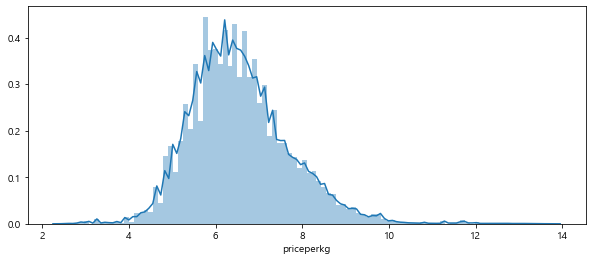

In [10]:
# 로그스케일링 histogram
f, ax = plt.subplots(figsize=(10, 4))
sns.distplot(np.log1p(df['priceperkg']), bins=100)

In [11]:
df[['aucsecode','aucsenm']].drop_duplicates()

,aucsecode,aucsenm
0,1,경매
173,2,정가수의
563,3,자기계산
159465,5,NaN
93660,4,매수도매


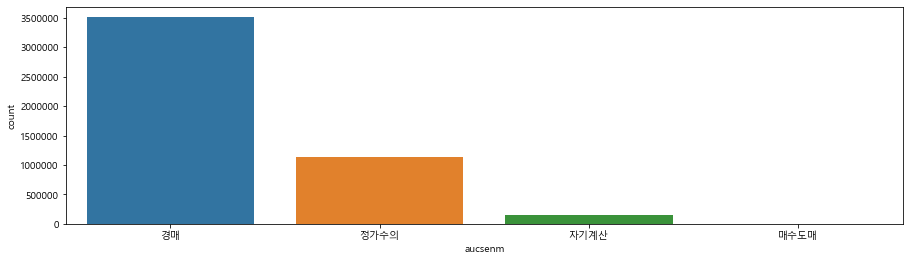

In [12]:
f, ax = plt.subplots(figsize=(15, 4))
sns.countplot(df['aucsenm'])

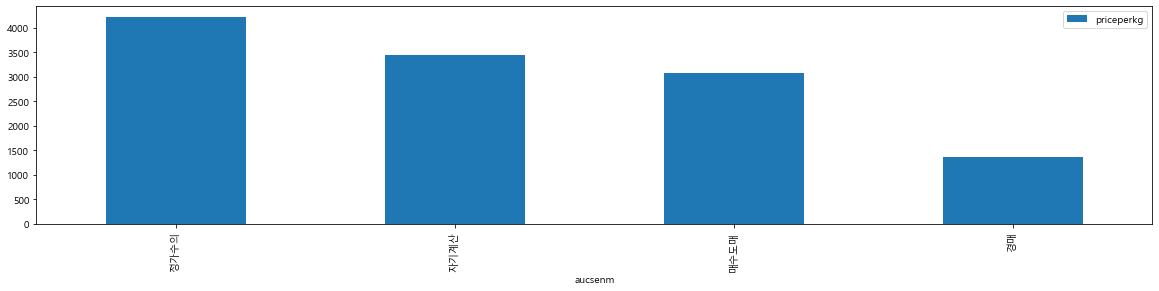

In [13]:
f, ax = plt.subplots(figsize=(20, 4))
df[['aucsenm','priceperkg']].groupby("aucsenm").mean().sort_values(by='priceperkg', ascending=False).plot.bar(ax=ax)

In [14]:
pd.DataFrame(df[['aucsenm','totalprice']].groupby("aucsenm").sum().sort_values(by='totalprice', ascending=False)['totalprice'].apply(lambda x: format(int(x), ',')))

,totalprice
aucsenm,
경매,"2,071,569,473,717"
정가수의,"637,495,159,329"
자기계산,"276,816,941,781"
매수도매,"4,058,375,475"


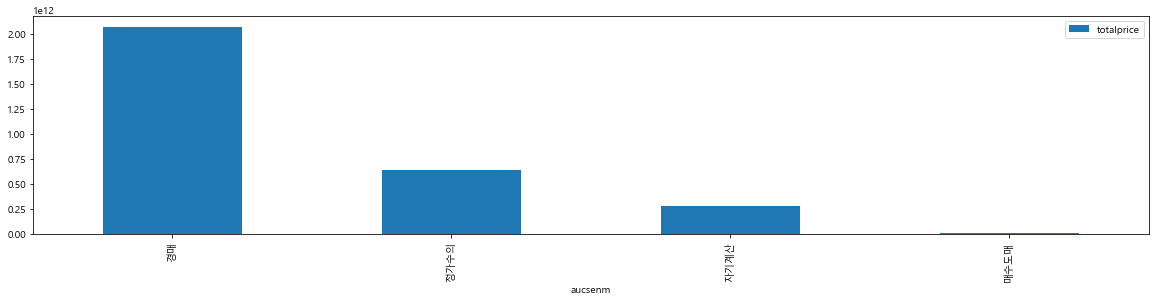

In [15]:
f, ax = plt.subplots(figsize=(20, 4))
df[['aucsenm','totalprice']].groupby("aucsenm").sum().sort_values(by='totalprice', ascending=False).plot.bar(ax=ax)

In [16]:
pd.DataFrame(df[['aucsenm','totalweight']].groupby("aucsenm").sum().sort_values(by='totalweight', ascending=False)['totalweight'].apply(lambda x: format(int(x), ',')))


,totalweight
aucsenm,
경매,"4,119,983,937"
정가수의,"823,944,667"
자기계산,"142,311,353"
매수도매,"7,377,151"


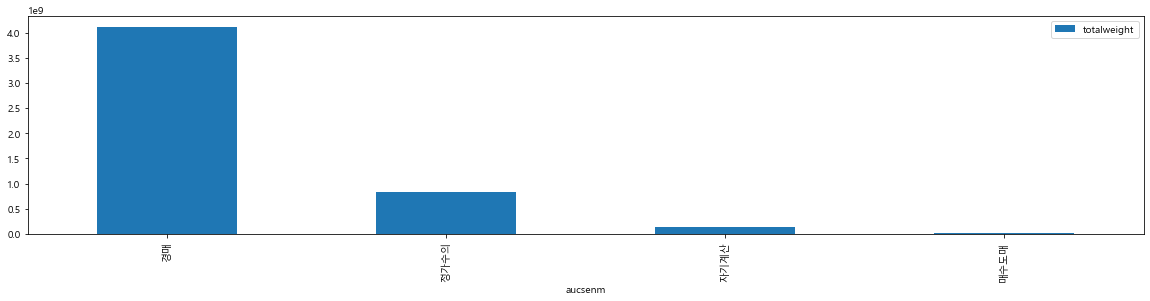

In [17]:
f, ax = plt.subplots(figsize=(20, 4))
df[['aucsenm','totalweight']].groupby("aucsenm").sum().sort_values(by='totalweight', ascending=False).plot.bar(ax=ax)

### 경락일자 delngde
### 거래단량 delngprut
### 거래량 delngqy

### 등급코드 stdqlitynewcode / stdqlitynewnm

In [18]:
df[['stdqlitynewcode','stdqlitynewnm']].drop_duplicates()

,stdqlitynewcode,stdqlitynewnm
0,11,특
1,12,상
2,00,NaN
208,1Z,무등급
202,13,보통
308,19,등외
96,14,4등
88,15,5등
9111,17,7등
24563,18,8등


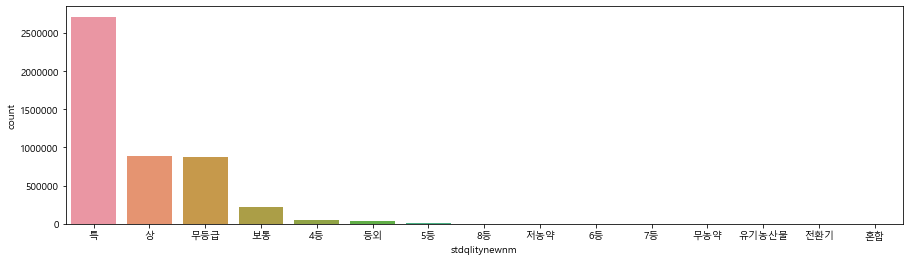

In [19]:
f, ax = plt.subplots(figsize=(15, 4))
sns.countplot(df['stdqlitynewnm'],order = df['stdqlitynewnm'].value_counts().index)

#### 그룹별 중위수 및 평균

In [20]:
pd.concat([
      df[(df['stdqlitynewnm'] == '특') | (df['stdqlitynewnm'] == '무등급') | (df['stdqlitynewnm'] == '상') | (df['stdqlitynewnm'] == '보통')][['stdqlitynewnm','priceperkg']].groupby("stdqlitynewnm").median()
    , df[(df['stdqlitynewnm'] == '특') | (df['stdqlitynewnm'] == '무등급') | (df['stdqlitynewnm'] == '상') | (df['stdqlitynewnm'] == '보통')][['stdqlitynewnm','totalweight']].groupby("stdqlitynewnm").median()
    , df[(df['stdqlitynewnm'] == '특') | (df['stdqlitynewnm'] == '무등급') | (df['stdqlitynewnm'] == '상') | (df['stdqlitynewnm'] == '보통')][['stdqlitynewnm','priceperkg']].groupby("stdqlitynewnm").mean()
    , df[(df['stdqlitynewnm'] == '특') | (df['stdqlitynewnm'] == '무등급') | (df['stdqlitynewnm'] == '상') | (df['stdqlitynewnm'] == '보통')][['stdqlitynewnm','totalweight']].groupby("stdqlitynewnm").mean()
] , axis=1)

,priceperkg,totalweight,priceperkg,totalweight
stdqlitynewnm,,,,
무등급,550.00,460.0,3089.233553,896.336937
보통,418.75,300.0,615.271284,930.655776
상,450.00,400.0,747.036077,952.466055
특,800.00,260.0,2427.918212,1135.864086


### boxplot이 너무 튀는 문제 발생

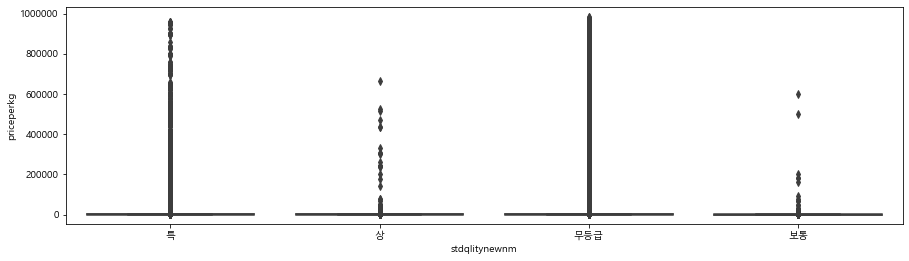

In [21]:
f, ax = plt.subplots(figsize=(15, 4))
fig = sns.boxplot(x='stdqlitynewnm', y='priceperkg', data=df[(df['stdqlitynewnm'] == '특') | (df['stdqlitynewnm'] == '무등급') | (df['stdqlitynewnm'] == '상') | (df['stdqlitynewnm'] == '보통')])

### 품종코드 stdspciesnewcode / stdspciesnewnm
- 구품종코드 stdspciescode stdspciesnm
- 품목코드 stdprdlstnewcode / stdprdlstnewnm
- 구품목코드 stdprdlstnm / stdprdlstcode 

In [22]:
df[['stdspciesnewcode','stdspciesnewnm']].drop_duplicates().sort_values('stdspciesnewcode')

,stdspciesnewcode,stdspciesnewnm
211,100101,봄배추
15,100102,여름배추
208,100103,김장(가을)배추
224,100104,월동배추
100,100105,고냉지배추
985,100106,저장배추
264,100107,생채용배추
3,100108,쌈(알배기)배추
55,100109,우거지
1268,100110,배추뿌리


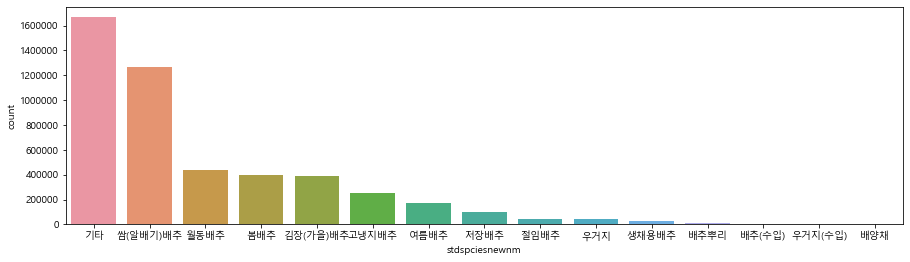

In [23]:
f, ax = plt.subplots(figsize=(15, 4))
sns.countplot(df['stdspciesnewnm'],order = df['stdspciesnewnm'].value_counts().index)

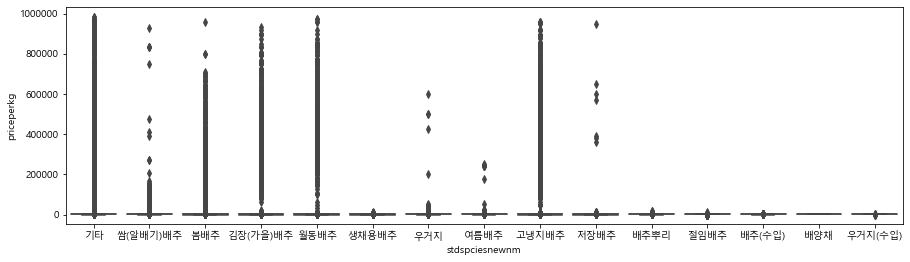

In [24]:
f, ax = plt.subplots(figsize=(15, 4))
fig = sns.boxplot(x='stdspciesnewnm', y='priceperkg', data=df)

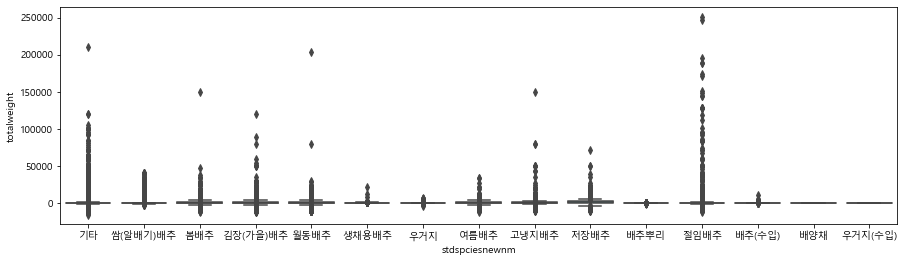

In [25]:
f, ax = plt.subplots(figsize=(15, 4))
fig = sns.boxplot(x='stdspciesnewnm', y='totalweight', data=df)

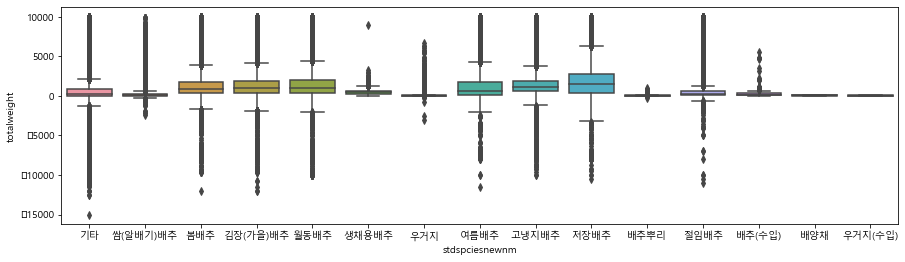

In [26]:
f, ax = plt.subplots(figsize=(15, 4))
fig = sns.boxplot(x='stdspciesnewnm', y='totalweight', data=df[(df['totalweight'] <= 10000)])

#### 년도별 분포 시각화
- 참고자료 : 1_1. 배추무게분포.ipynb

### 산지코드 stdmtcnewcode / stdmtcnewnm
- 구산지코드 cprmtccode / cprmtcnm

In [27]:
# 결측값이 너무 많으므로 처리방안 고려 필요
df[df['stdmtcnewnm'] == ''].shape

(0, 49)

In [28]:
# df[['stdmtcnewcode','stdmtcnewnm']].drop_duplicates()
df[['stdmtcnewnm']].drop_duplicates()

,stdmtcnewnm
0,NaN
3,부산광역시 강서구
211,경상남도 산청군
210,경상북도 구미시
202,전라남도 순천시
230,울산광역시 남구
222,경상남도 밀양시
220,경상남도 합천군
173,충청남도 천안시
159,충청북도 충주시


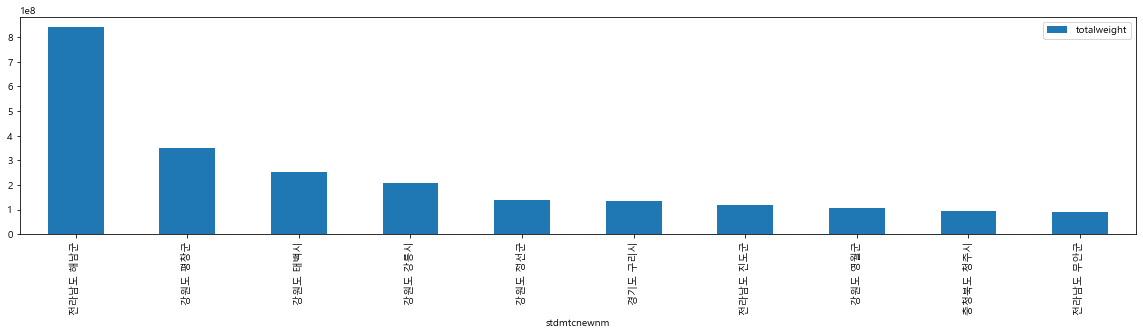

In [29]:
f, ax = plt.subplots(figsize=(20, 4))
df[['stdmtcnewnm','totalweight']].groupby("stdmtcnewnm").sum().sort_values(by='totalweight', ascending=False)[0:10].plot.bar(ax=ax)

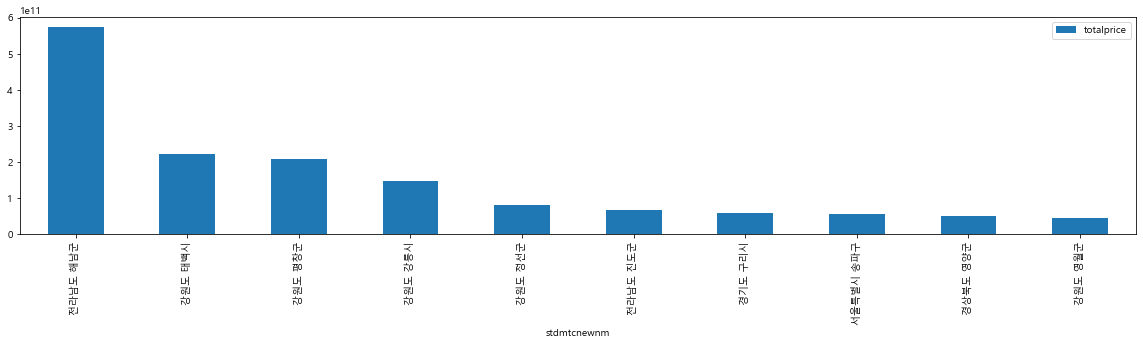

In [30]:
f, ax = plt.subplots(figsize=(20, 4))
df[['stdmtcnewnm','totalprice']].groupby("stdmtcnewnm").sum().sort_values(by='totalprice', ascending=False)[0:10].plot.bar(ax=ax)

### 단위코드 stdunitnewcode / stdunitnewnm

In [31]:
df[['stdunitnewcode','stdunitnewnm']].drop_duplicates()

,stdunitnewcode,stdunitnewnm
0,12,kg
563,13,ton
89632,11,g


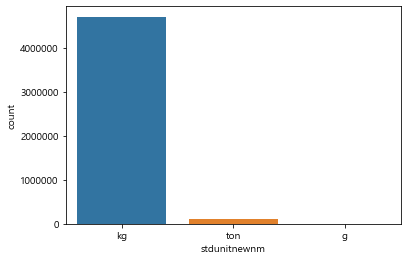

In [32]:
sns.countplot(df['stdunitnewnm'])

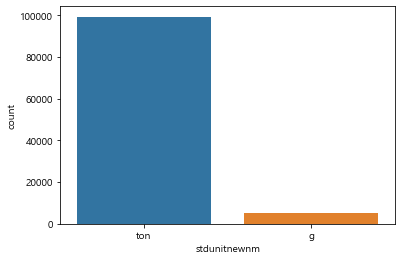

In [33]:
sns.countplot(df[(df['stdunitnewcode'] != 12)]['stdunitnewnm'])

### 시장코드 whsalmrktnewcode / whsalmrktnewnm
- 구시장코드 whsalmrktcode / whsalmrktnm 
- 가락시장 코드 1005601(신) 110001(구)

In [34]:
df[['whsalmrktcode','whsalmrktnewcode','whsalmrktnewnm']].drop_duplicates()

,whsalmrktcode,whsalmrktnewcode,whsalmrktnewnm
0,360101,2058701,목포농산물도매시장
3,210001,1046901,부산엄궁농산물도매시장
211,380101,1051102,창원팔용농산물도매시장
210,371501,1039301,구미농산물도매시장
202,360301,1057901,순천농산물도매시장
230,380201,1044701,울산농수산물도매시장
173,340101,1031201,천안농산물도매시장
159,330201,1027301,충주농수산물도매시장
185,350402,1056101,정읍농산물도매시장
182,350101,1055001,전주농수산물도매시장


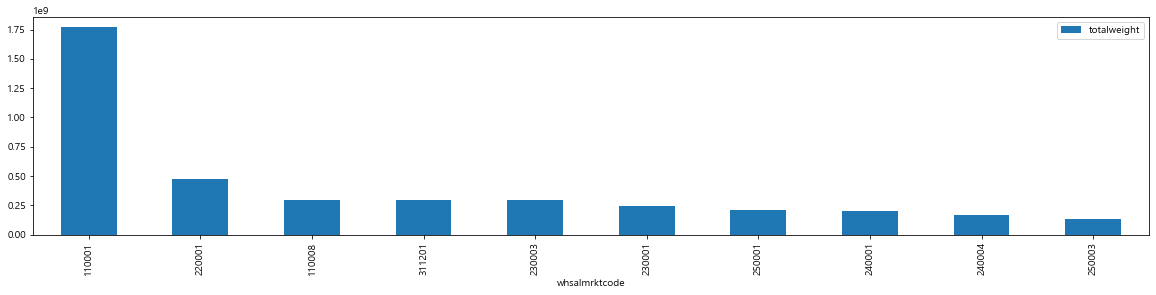

In [35]:
f, ax = plt.subplots(figsize=(20, 4))
df[['whsalmrktcode','totalweight']].groupby("whsalmrktcode").sum().sort_values(by='totalweight', ascending=False)[0:10].plot.bar(ax=ax)

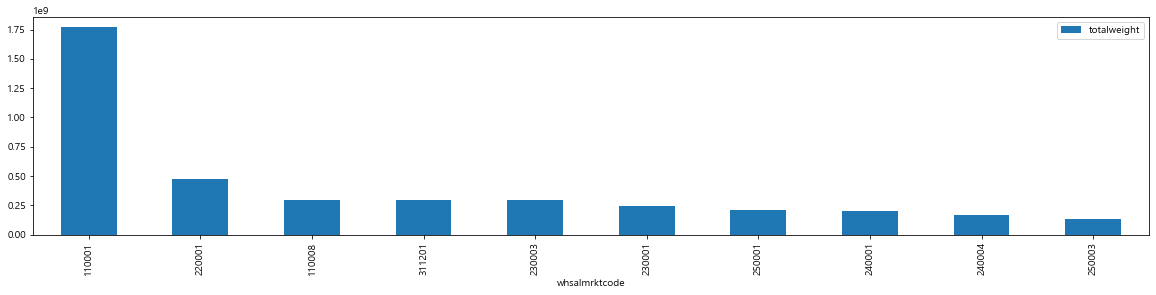

In [36]:
f, ax = plt.subplots(figsize=(20, 4))
df[['whsalmrktcode','totalweight']].groupby("whsalmrktcode").sum().sort_values(by='totalweight', ascending=False)[0:10].plot.bar(ax=ax)

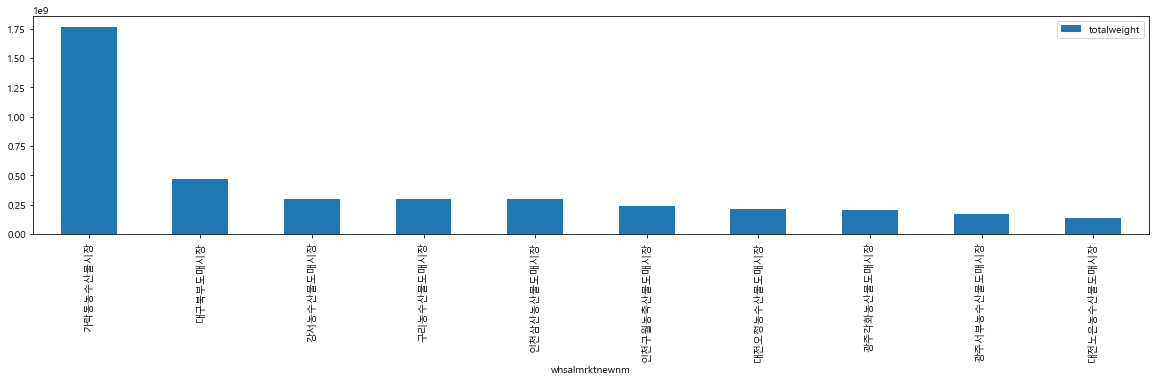

In [37]:
f, ax = plt.subplots(figsize=(20, 4))
df[['whsalmrktnewnm','totalweight']].groupby("whsalmrktnewnm").sum().sort_values(by='totalweight', ascending=False)[0:10].plot.bar(ax=ax)

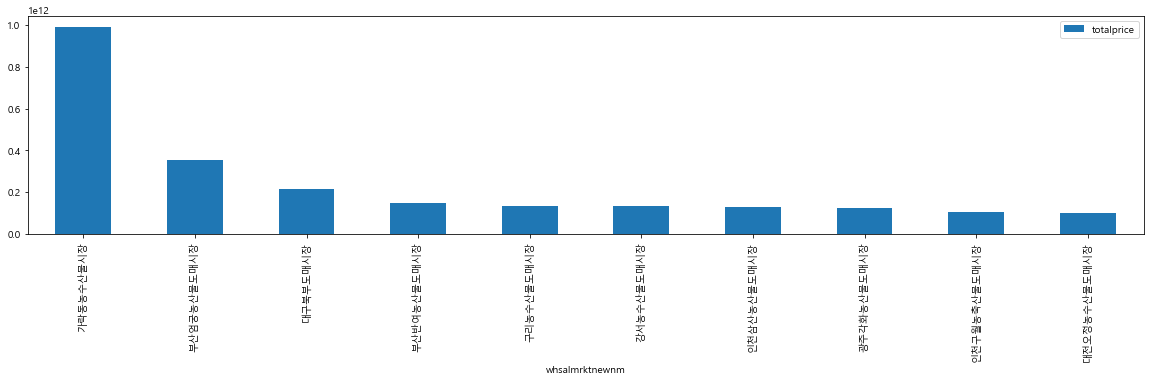

In [38]:
f, ax = plt.subplots(figsize=(20, 4))
df[['whsalmrktnewnm','totalprice']].groupby("whsalmrktnewnm").sum().sort_values(by='totalprice', ascending=False)[0:10].plot.bar(ax=ax)

## 데이터 가공 후 외상치 검출

In [39]:
df['yyyy']   = df['delngde'].apply(lambda x: str(x)[0:4])
df['yyyymm'] = df['delngde'].apply(lambda x: str(x)[0:6])
df['yyyy'] = df['yyyy'].apply(lambda x: int(x))
df['yyyymm'] = df['yyyymm'].apply(lambda x: int(x))
# 정렬
df = df.sort_values(["yyyymm"], ascending=[True])

### 가설
- 산지, 시장, 날짜, 등급, 경매, 품종에 따른 차이가 있을것이다

### 가설1. 품종에 따른 가격차이가 있을것이다
-100101	봄배추
-100102	여름배추
-100103	김장(가을)배추
-100104	월동배추
-100105	고냉지배추
-100106	저장배추

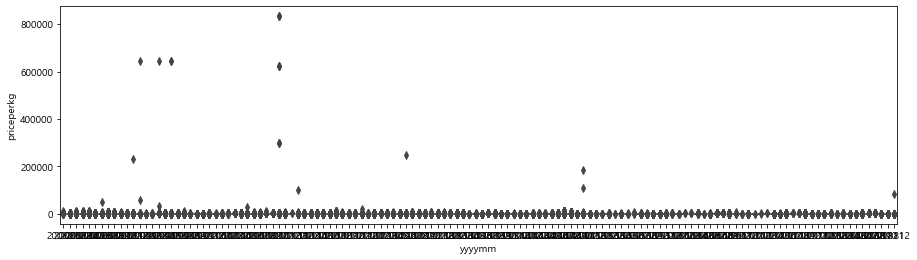

In [40]:
f, ax = plt.subplots(figsize=(15, 4))
fig = sns.boxplot(x='yyyymm', y='priceperkg'
                  , data=df[(df['stdqlitynewnm'] == '특')
#                             & ((2008 <= df['yyyy']) & (df['yyyy'] <= 2014))
                            & (df['aucsecode'] == 1)
                            & ((df['stdspciesnewcode'] == 100101)
                                | (df['stdspciesnewcode'] == 100102)
                                | (df['stdspciesnewcode'] == 100103)
                                | (df['stdspciesnewcode'] == 100104)
                                | (df['stdspciesnewcode'] == 100105)
                                | (df['stdspciesnewcode'] == 100106))
                           ])

In [41]:
# 외상치로 예상되는 가격범위의 갯수
df[(df['stdqlitynewnm'] == '특')
#                             & ((2008 <= df['yyyy']) & (df['yyyy'] <= 2014))
    & (df['aucsecode'] == 1)
    & ((df['stdspciesnewcode'] == 100101)
        | (df['stdspciesnewcode'] == 100102)
        | (df['stdspciesnewcode'] == 100103)
        | (df['stdspciesnewcode'] == 100104)
        | (df['stdspciesnewcode'] == 100105)
        | (df['stdspciesnewcode'] == 100106))
    & ((80 <= df['priceperkg']) & (df['priceperkg'] >= 3000))
].shape

(2252, 50)

### 가설1 결과
- 많은 외상치들이 줄어 들었지만 그래도 간간히 보임

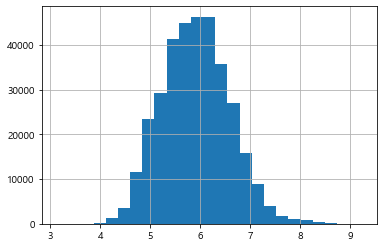

In [42]:
np.log(df[
    (df['aucsecode'] == 1)
    & (
        (df['stdspciesnewcode'] == 100101)
            | (df['stdspciesnewcode'] == 100102)
            | (df['stdspciesnewcode'] == 100103)
            | (df['stdspciesnewcode'] == 100104)
            | (df['stdspciesnewcode'] == 100105)
            | (df['stdspciesnewcode'] == 100106)
    )
    & (
        (df['whsalmrktcode'] == 110001)
            | (df['whsalmrktcode'] == 210001)
            | (df['whsalmrktcode'] == 220001)
#         | (df['whsalmrktcode'] == 230003)
      )
]['priceperkg']).hist(bins=25)

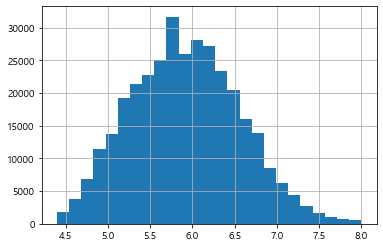

In [43]:
np.log(df[
    (df['aucsecode'] == 1)
#     & (df['yyyymm']>=200801)
#     & (df['yyyymm']==201411)
    & ((80 < df['priceperkg']) & (df['priceperkg'] < 3000))
    & (
        (df['stdspciesnewcode'] == 100101)
            | (df['stdspciesnewcode'] == 100102)
            | (df['stdspciesnewcode'] == 100103)
            | (df['stdspciesnewcode'] == 100104)
            | (df['stdspciesnewcode'] == 100105)
            | (df['stdspciesnewcode'] == 100106)
    )
    & (
        (df['whsalmrktcode'] == 110001)
            | (df['whsalmrktcode'] == 210001)
            | (df['whsalmrktcode'] == 220001)
#         | (df['whsalmrktcode'] == 230003)
      )
]['priceperkg']).hist(bins=25)

### 가설2. 시장마다 가격을 입력하는 방법이 잘못되어 외상치가 있을 것이다
- 거래금액이 가장 큰 TOP3 시장만을 선정
- 1. 110001	가락동농수산물시장
- 2. 210001	부산엄궁농산물도매시장
- 3. 220001	대구북부도매시장

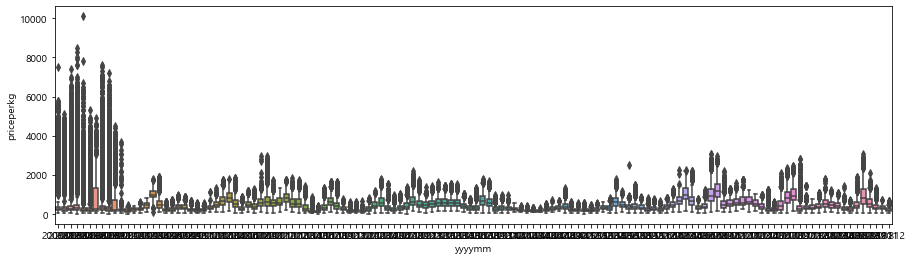

In [44]:
# 데이터 오류 검출
f, ax = plt.subplots(figsize=(15, 4))
fig = sns.boxplot(x='yyyymm', y='priceperkg'
    , data=df[
    (df['aucsecode'] == 1)
    & (
        (df['stdspciesnewcode'] == 100101)
            | (df['stdspciesnewcode'] == 100102)
            | (df['stdspciesnewcode'] == 100103)
            | (df['stdspciesnewcode'] == 100104)
            | (df['stdspciesnewcode'] == 100105)
            | (df['stdspciesnewcode'] == 100106)
    )
    & (
        (df['whsalmrktcode'] == 110001)
            | (df['whsalmrktcode'] == 210001)
            | (df['whsalmrktcode'] == 220001)
      )
])

### 가설2 결과
- 외상치가 현저히 줄어들었지만 2008년의 경우 외상치가 너무 높게 나옴

### 가설2.2 2008년은 데이터 입력 교육 과도기 과정에서 일어난 human error가 발생되었다

(0, 3000)

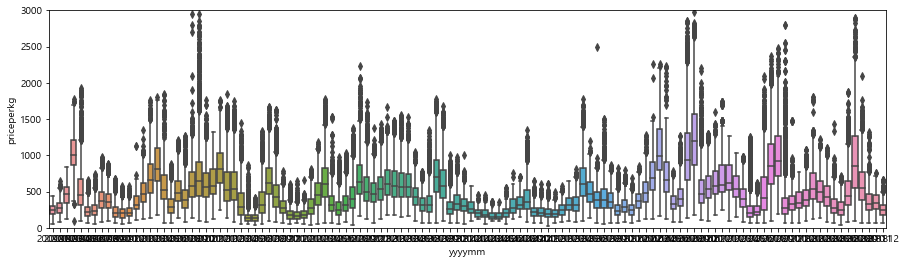

In [45]:
# 2008년 1년치 데이터 제거 후 boxplot
f, ax = plt.subplots(figsize=(15, 4))
fig = sns.boxplot(x='yyyymm', y='priceperkg'
    , data=df[
    (df['aucsecode'] == 1)
    & (df['yyyymm'] >= 200901)
    & (
        (df['stdspciesnewcode'] == 100101)
            | (df['stdspciesnewcode'] == 100102)
            | (df['stdspciesnewcode'] == 100103)
            | (df['stdspciesnewcode'] == 100104)
            | (df['stdspciesnewcode'] == 100105)
            | (df['stdspciesnewcode'] == 100106)
    )
    & (
        (df['whsalmrktcode'] == 110001)
            | (df['whsalmrktcode'] == 210001)
            | (df['whsalmrktcode'] == 220001)
      )
])
ax.set_ylim([0, 3000])

### 가설2.2 결과
- 현저히 많은 외상치들과 가격폭이 줄어듦

### 데이터적 오류 검출
- 공공데이터를 활용해서 데이터 추출
- 모든 시장데이터를 활용했을 때 외상치가 너무 높게 나옴
- 일부 시장 데이터만 활용
- 외상치가 많이 줄어듦
- 공공데이터 활용시 모든 데이터가 클린하지 않으므로 data가공이 중요함을 발견

#### 앞에 데이터를 자르는 이유
- boxplot에서 외상치가 너무 많이 나옴
- 교육이 잘못되서 human error가 발생되었다고 판단
- 1년치 데이터 제거